# Optimal new transmission

This notebook contains different visualization of the online and built capacity.

In [53]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import get_data_sftp
from utils import tech_order, tech_colors

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.1f}'.format

#### Notebook constants

In [54]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ["scenario_190", "scenario_191", "scenario_192", "scenario_193", "scenario_194", "scenario_195", "scenario_196", "scenario_197",
                 "scenario_198", "scenario_199"]
savefig = False
folder_to_save_results="results/"

In [55]:
figure_names={"scenario_190": 1, "scenario_191": 2, "scenario_192": 3, "scenario_193": 4, "scenario_194" : 5, "scenario_195": 6,
              "scenario_196" : 9, "scenario_197" : 8, "scenario_198" : 9, "scenario_199": 10}

## Reading scenario inputs and results

In [56]:
# Read file with optimal additions
fname = "BuildTx.csv"
build_Tx = get_data_sftp(hostname, username, scenario_name, fname)
build_Tx = build_Tx[build_Tx['TRANS_BLD_YRS_2']==2050]

In [57]:
# Read input file with existing transmission
fname = "transmission_lines.csv"
existing_Tx = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs")

In [58]:
build_Tx=build_Tx.replace({"scenario": figure_names})
build_Tx = build_Tx.astype({'scenario':'int'})
existing_Tx=existing_Tx.replace({"scenario": figure_names})
existing_Tx = existing_Tx.astype({'scenario':'int'})

### Data transformation

- Add Tx metadata to output
- Calculate total Tx additions by Tx_line by period
- Sort Tx lines by number
- Transform MW to GW

In [59]:
build_Tx_meta = pd.merge(
    left=build_Tx,
    right=existing_Tx,
    left_on=["TRANS_BLD_YRS_1", "scenario"],
    right_on=["TRANSMISSION_LINE", "scenario"],
)
new_name=build_Tx_meta["TRANSMISSION_LINE"]+build_Tx_meta["trans_lz1"]
build_Tx_meta["Tx_lz"]=build_Tx_meta["TRANSMISSION_LINE"]+": "+build_Tx_meta["trans_lz1"]+" to "+build_Tx_meta["trans_lz2"]


In [60]:
build_Tx_meta

,TRANS_BLD_YRS_1,TRANS_BLD_YRS_2,BuildTx,scenario,TRANSMISSION_LINE,trans_lz1,trans_lz2,trans_length_km,trans_efficiency,existing_trans_cap,trans_dbid,trans_derating_factor,trans_terrain_multiplier,trans_new_build_allowed,Tx_lz
0,1-2,2050,0.0,1,1-2,AZ_APS_E,AZ_APS_N,374.1,1.0,281.0,374,0.6,1.1,1,1-2: AZ_APS_E to AZ_APS_N
1,1-34,2050,0.0,1,1-34,AZ_APS_E,NM_S_TX_EPE,645.3,1.0,657.0,391,0.6,0.9,1,1-34: AZ_APS_E to NM_S_TX_EPE
2,1-4,2050,"2,568.5",1,1-4,AZ_APS_E,AZ_NM_N,255.8,1.0,"3,498.0",355,0.6,1.0,1,1-4: AZ_APS_E to AZ_NM_N
3,1-6,2050,"2,162.5",1,1-6,AZ_APS_E,AZ_PHX,260.7,1.0,"2,928.0",363,0.6,1.3,1,1-6: AZ_APS_E to AZ_PHX
4,1-7,2050,0.0,1,1-7,AZ_APS_E,AZ_SE,307.2,1.0,"4,138.0",384,0.6,1.3,1,1-7: AZ_APS_E to AZ_SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,8-30,2050,0.0,10,8-30,CAN_ALB,MT_NW,"1,020.0",0.9,0.0,530,0.6,1.5,1,8-30: CAN_ALB to MT_NW
1146,8-9,2050,0.0,10,8-9,CAN_ALB,CAN_BC,"1,024.0",0.9,"1,369.0",523,0.6,1.5,1,8-9: CAN_ALB to CAN_BC
1147,9-43,2050,0.0,10,9-43,CAN_BC,WA_ID_AVA,526.9,1.0,506.0,1619,0.6,1.8,1,9-43: CAN_BC to WA_ID_AVA
1148,9-44,2050,"6,364.7",10,9-44,CAN_BC,WA_N_CEN,441.6,1.0,0.0,1653,0.6,1.7,1,9-44: CAN_BC to WA_N_CEN


In [61]:
build_Tx_MW = build_Tx_meta.pivot_table(
    index="Tx_lz", columns="scenario", values="BuildTx", aggfunc=np.sum
)

In [62]:
build_Tx_MW

scenario,1,10,2,3,4,5,6,7,8,9
Tx_lz,,,,,,,,,,
1-2: AZ_APS_E to AZ_APS_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-34: AZ_APS_E to NM_S_TX_EPE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-4: AZ_APS_E to AZ_NM_N,"2,568.5",477.6,"2,580.4","2,121.0","1,119.0","1,040.1","5,063.9","3,604.1","2,454.4",936.5
1-6: AZ_APS_E to AZ_PHX,"2,162.5",0.0,"2,266.6","1,813.8",699.9,416.9,"4,618.3","3,281.2","2,100.7",642.1
1-7: AZ_APS_E to AZ_SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8-30: CAN_ALB to MT_NW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8-9: CAN_ALB to CAN_BC,342.6,0.0,195.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9-43: CAN_BC to WA_ID_AVA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Extract number of Tx lines into two separate columns
build_Tx_MW["index1"] = build_Tx_MW.index.str.extract("(\d+)", expand=False).astype(int)
build_Tx_MW["index2"] = build_Tx_MW.index.str.extract(".-(\d+)", expand=False).astype(int)

# Sort TX lines by no. of tx
build_Tx_MW = build_Tx_MW.sort_values(["index1", "index2"]).loc[
    :, build_Tx.scenario.unique()
]

# Convert units
build_Tx_GW = build_Tx_MW / 1e3  # MW to GW
build_Tx_GW


scenario,1,2,3,4,5,6,7,8,9,10
Tx_lz,,,,,,,,,,
1-2: AZ_APS_E to AZ_APS_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-4: AZ_APS_E to AZ_NM_N,2.6,2.6,2.1,1.1,1.0,5.1,3.6,2.5,0.9,0.5
1-6: AZ_APS_E to AZ_PHX,2.2,2.3,1.8,0.7,0.4,4.6,3.3,2.1,0.6,0.0
1-7: AZ_APS_E to AZ_SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-34: AZ_APS_E to NM_S_TX_EPE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
47-48: WY_NE to WY_NW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47-49: WY_NE to WY_SE,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1
48-49: WY_NW to WY_SE,14.1,14.6,15.5,15.5,16.1,15.1,15.4,15.6,15.6,16.1


## Analysis of results

In [64]:
build_Tx_total_GW = pd.DataFrame(build_Tx_GW.sum(axis=0)).rename(columns={0:'Tx_total_GW'})
build_Tx_total_GW

,Tx_total_GW
scenario,
1,190.5
2,192.8
3,197.0
4,196.5
5,198.5
6,203.7
7,203.8
8,200.4
9,192.5


In [65]:
sc= list(build_Tx_total_GW.index)
plot_1=sc[0:int(round(len(sc)/2,0))]
plot_2=sc[int(round(len(sc)/2,0)):int(len(sc))]
group_1 = build_Tx_total_GW.loc[plot_1,:]
group_2 = build_Tx_total_GW.loc[plot_2,:]

### Distribution of capacity 

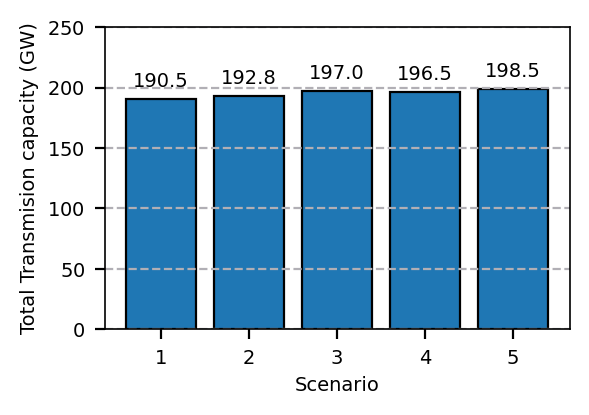

In [66]:
plt.show()

plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 

fig, ax = plt.subplots(figsize=(3, 2), dpi=200)
fig.subplots_adjust(wspace=.3)

fig.patch.set_facecolor('white')

p1 = ax.bar(group_1.index,height=group_1['Tx_total_GW'])
#ax.set_title('Total Transmission Capacity in WECC Scenarios 190-194',fontsize=7)
ax.set_xlabel("Scenario",fontsize=7)
ax.set_ylabel("Total Transmision capacity (GW)",fontsize=7)
ax.grid(axis='y', linestyle='dashed')

for p in p1:
   height = p.get_height()
   ax.annotate('{:,.1f}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

#fig.suptitle("Total Transmission Capacity in WECC per Scenario",fontsize=7)
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.savefig("Transmission capacity in WECC (Scenarios 190-194).png", transparent=False)

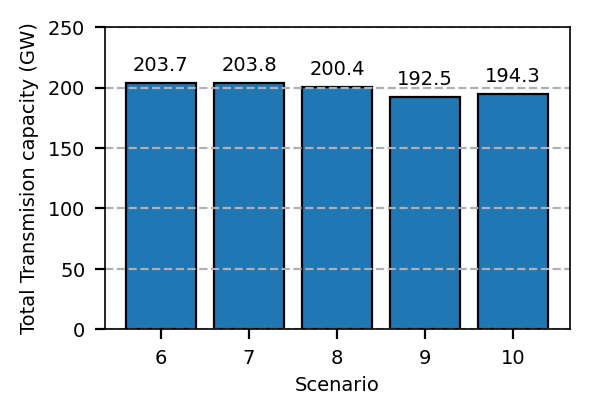

In [67]:
plt.show()

plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 

fig, ax = plt.subplots(figsize=(3, 2), dpi=200)
fig.subplots_adjust(wspace=.3)

fig.patch.set_facecolor('white')

p2 = ax.bar(group_2.index,height=group_2['Tx_total_GW'])
#ax.set_title('Total Transmission Capacity in WECC Scenarios 190-194',fontsize=7)
ax.set_xlabel("Scenario",fontsize=7)
ax.set_ylabel("Total Transmision capacity (GW)",fontsize=7)
ax.grid(axis='y', linestyle='dashed')

for p in p2:
   height = p.get_height()
   ax.annotate('{:,.1f}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

#fig.suptitle("Total Transmission Capacity in WECC per Scenario",fontsize=7)
#ax.patch.set_facecolor('white')

plt.savefig("Transmission capacity in WECC (Scenarios 195-199).png", transparent=False)

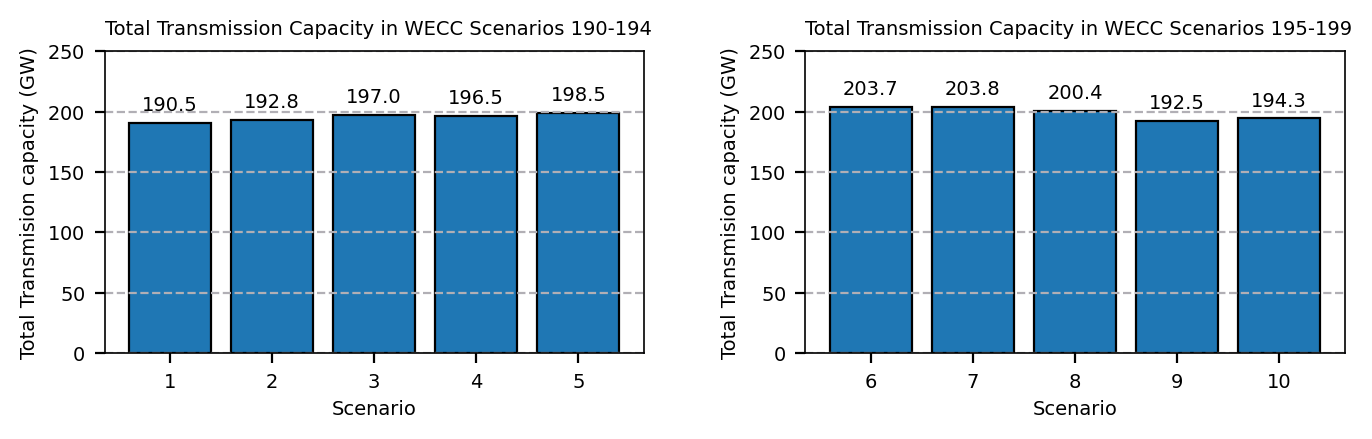

In [68]:
plt.show()

plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8, 2), dpi=200)
fig.subplots_adjust(wspace=.3)

fig.patch.set_facecolor('white')

p1 = ax1.bar(group_1.index,height=group_1['Tx_total_GW'])
ax1.set_title('Total Transmission Capacity in WECC Scenarios 190-194',fontsize=7)
ax1.set_xlabel("Scenario",fontsize=7)
ax1.set_ylabel("Total Transmision capacity (GW)",fontsize=7)
ax1.grid(axis='y', linestyle='dashed')

for p in p1:
   height = p.get_height()
   ax1.annotate('{:,.1f}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

p2 = ax2.bar(group_2.index,height=group_2['Tx_total_GW'])
ax2.set_title('Total Transmission Capacity in WECC Scenarios 195-199',fontsize=7)
ax2.set_xlabel("Scenario",fontsize=7)
ax2.set_ylabel("Total Transmision capacity (GW)",fontsize=7)
ax2.grid(axis='y', linestyle='dashed')

for p in p2:
   height = p.get_height()
   ax2.annotate('{:,.1f}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

#fig.suptitle("Total Transmission Capacity in WECC per Scenario",fontsize=7)
#ax1.patch.set_facecolor('white')

plt.savefig("Transmission capacity in WECC (subplots).png", transparent=False)

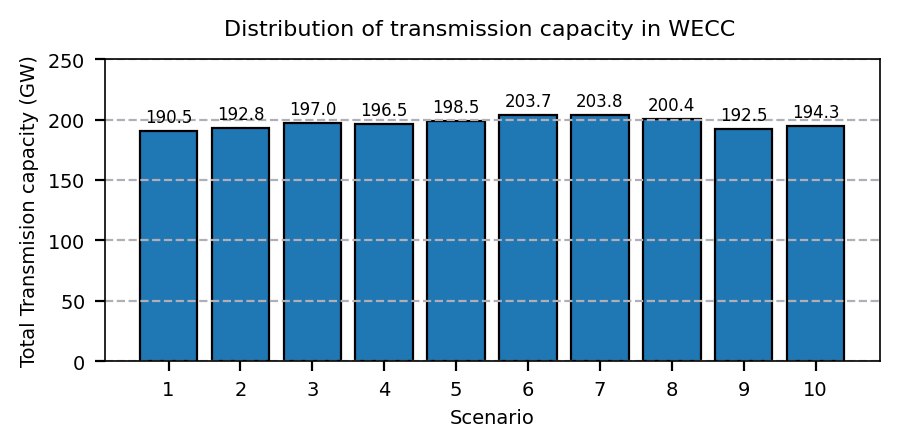

<Figure size 600x400 with 0 Axes>

In [69]:
fig, ax = plt.subplots(figsize=(5, 2), dpi=200)

fig.patch.set_facecolor('white')

ax.bar(build_Tx_total_GW.index,height=build_Tx_total_GW['Tx_total_GW'])
#ax.set_xlim(left=0)

ax.set_xlabel("Scenario",fontsize=7)
ax.set_ylabel("Total Transmision capacity (GW)",fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax.grid(axis='y', linestyle='dashed')

fig.suptitle("Distribution of transmission capacity in WECC")
ax.patch.set_facecolor('white')

xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
for i, v in enumerate(build_Tx_total_GW['Tx_total_GW']):
    plt.text(xlocs[i]-1, v+4, str(round(v,1)),horizontalalignment="center", verticalalignment="bottom",fontsize=6)
plt.show()

plt.savefig("Distribution of transmission capacity in WECC.png", transparent=False)

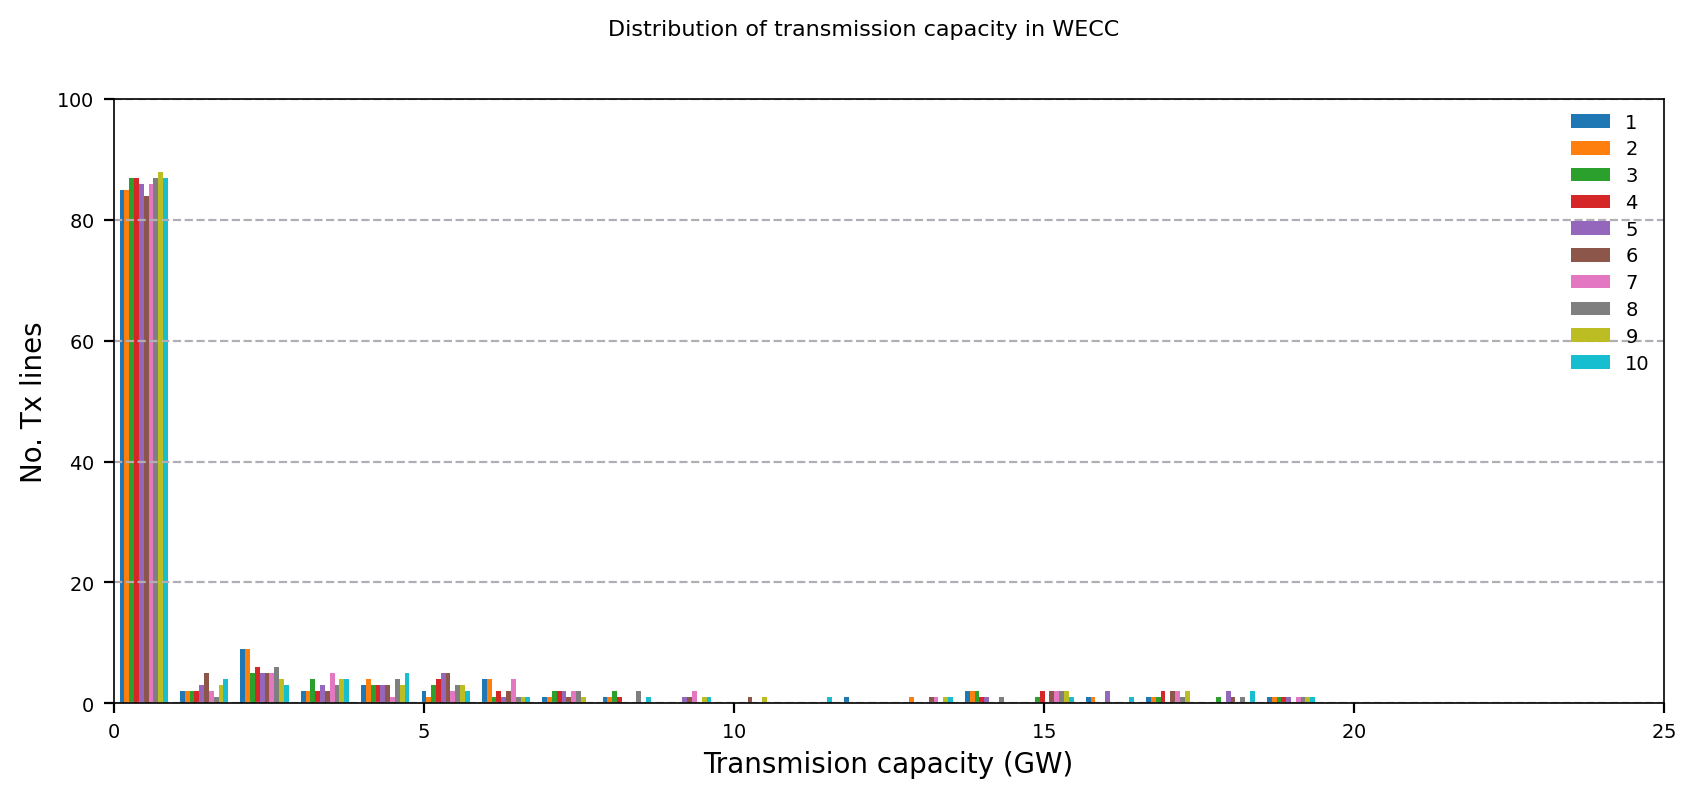

In [70]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

fig.patch.set_facecolor('white')

ax.hist(build_Tx_GW.values, lw=0, bins=20, label=build_Tx_GW.columns.values)
ax.set_xlim(left=0)

ax.set_xlabel("Transmision capacity (GW)")
ax.set_ylabel("No. Tx lines")
plt.legend(fontsize=7)

ax.grid(axis='y', linestyle='dashed')

fig.suptitle("Distribution of transmission capacity in WECC")

ax.patch.set_facecolor('white')

plt.savefig("Distribution of transmission capacity in WECC.png", transparent=False)

### New capacity by transmission line

scenario,1,2,3,4,5,6,7,8,9,10
Tx_lz,,,,,,,,,,
1-2: AZ_APS_E to AZ_APS_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-4: AZ_APS_E to AZ_NM_N,2.6,2.6,2.1,1.1,1.0,5.1,3.6,2.5,0.9,0.5
1-6: AZ_APS_E to AZ_PHX,2.2,2.3,1.8,0.7,0.4,4.6,3.3,2.1,0.6,0.0
1-7: AZ_APS_E to AZ_SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-34: AZ_APS_E to NM_S_TX_EPE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
47-48: WY_NE to WY_NW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47-49: WY_NE to WY_SE,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1
48-49: WY_NW to WY_SE,14.1,14.6,15.5,15.5,16.1,15.1,15.4,15.6,15.6,16.1


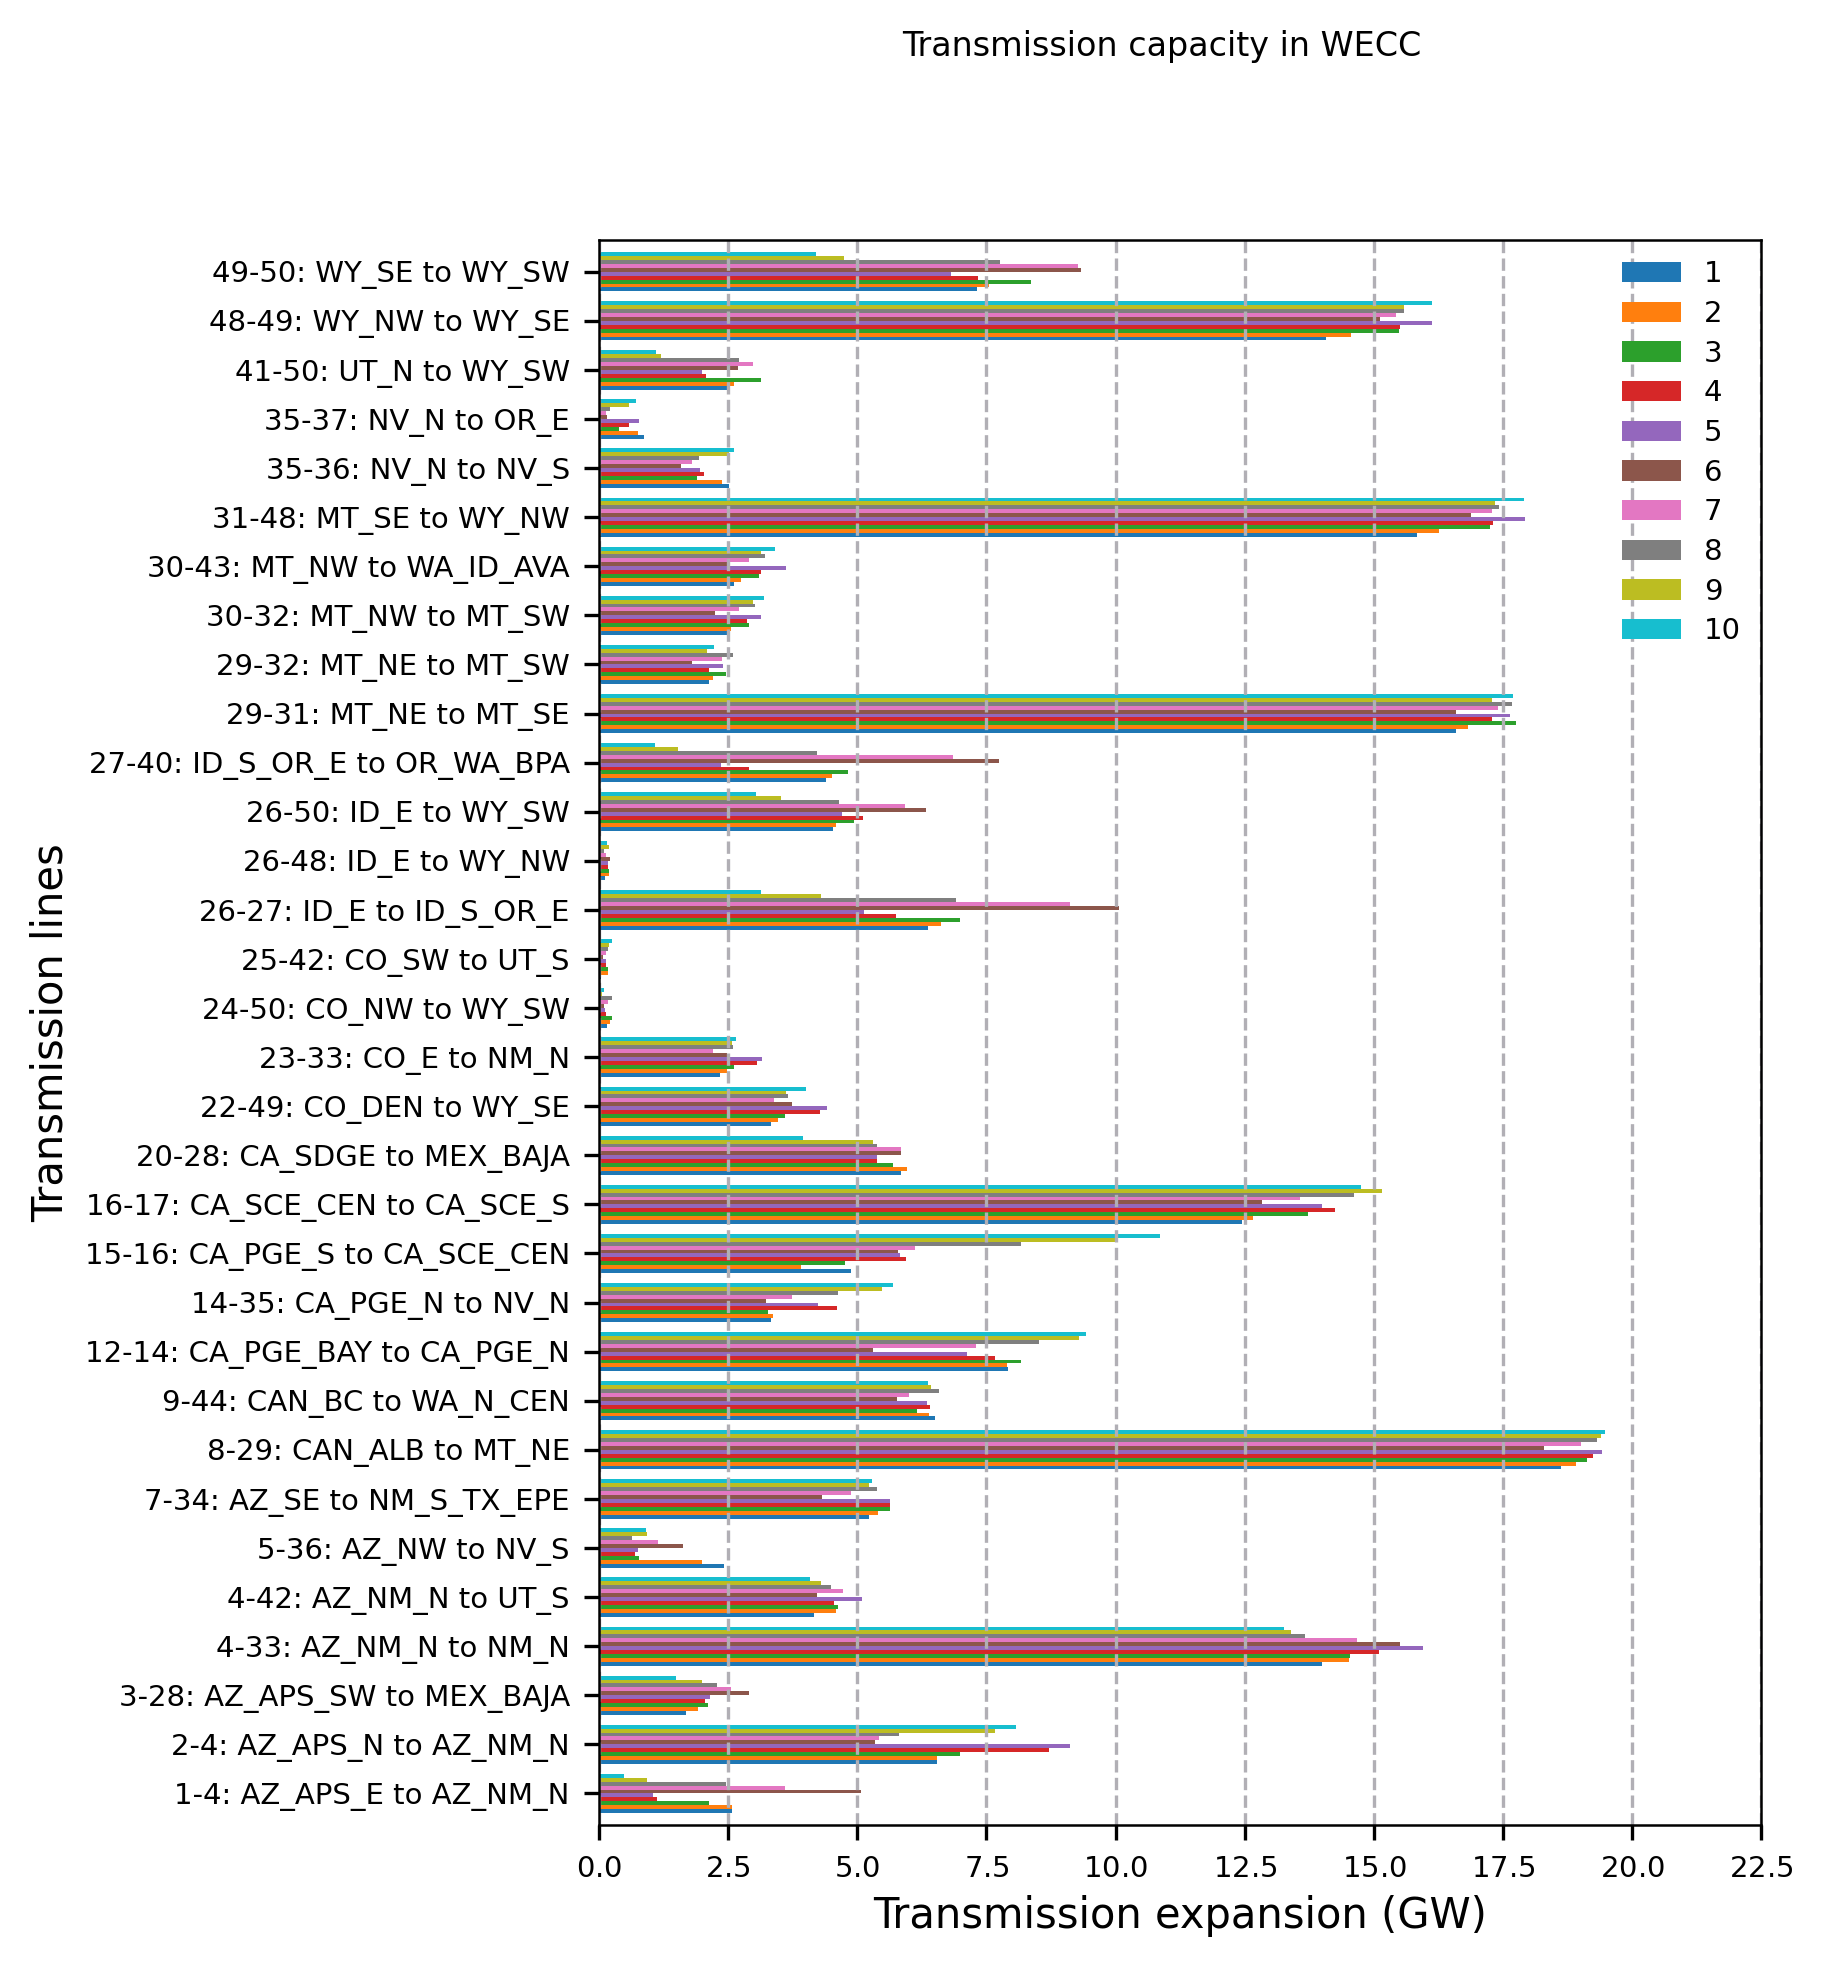

In [71]:
# Start figure environment
fig = plt.figure(figsize=(5,  7), dpi=300)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data = (build_Tx_GW[build_Tx_GW != 0]).dropna()

# Main figure
data.plot.barh(ax=ax, lw=0, width=0.8)
plt.xlabel("Transmission expansion (GW)")
plt.ylabel("Transmission lines")

ax.grid(axis='x', linestyle='dashed')

fig.suptitle("Transmission capacity in WECC")

ax.patch.set_facecolor('white')

plt.savefig("Transmission capacity in WECC.png", transparent=False)

plt.legend(fontsize=7)

build_Tx_GW

### California in-state expansion

In [72]:
#build_Tx_inCa = build_Tx_meta[build_Tx_meta.trans_lz1.str.contains("CA_")]
build_Tx_inCa = build_Tx_meta.loc[build_Tx_meta.trans_lz1.str.contains("CA_") & build_Tx_meta.trans_lz2.str.contains("CA_")]

build_Tx_inCa_MW = build_Tx_inCa.pivot_table(
    index="Tx_lz", columns="scenario", values="BuildTx", aggfunc=np.sum
)

build_Tx_inCa_MW["index1"]= build_Tx_inCa_MW.index.str.extract("(\d+)", expand=False).astype(int)
build_Tx_inCa_MW["index2"]= build_Tx_inCa_MW.index.str.extract(".-(\d+)", expand=False).astype(int)

build_Tx_inCa_MW = build_Tx_inCa_MW.sort_values(["index1", "index2"]).loc[
    :, build_Tx.scenario.unique()]

# Convert units
build_Tx_inCa_GW = build_Tx_inCa_MW / 1e3  # MW to GW   

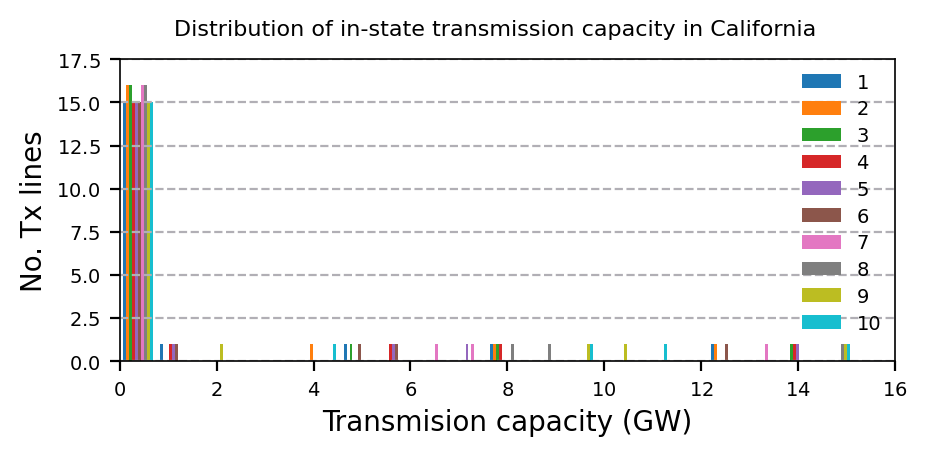

In [73]:
#Plot
fig = plt.figure(figsize=(5,  2), dpi=200)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

ax.hist(build_Tx_inCa_GW.values, lw=0, bins=20, label=build_Tx_inCa_GW.columns.values)
ax.set_xlim(left=0)

ax.set_xlabel("Transmision capacity (GW)")
ax.set_ylabel("No. Tx lines")
ax.grid(axis='y', linestyle='dashed')
plt.legend(fontsize=7)

fig.suptitle("Distribution of in-state transmission capacity in California")

ax.patch.set_facecolor('white')

plt.savefig("Distribution of In-state transmission capacity in California.png", transparent=False)

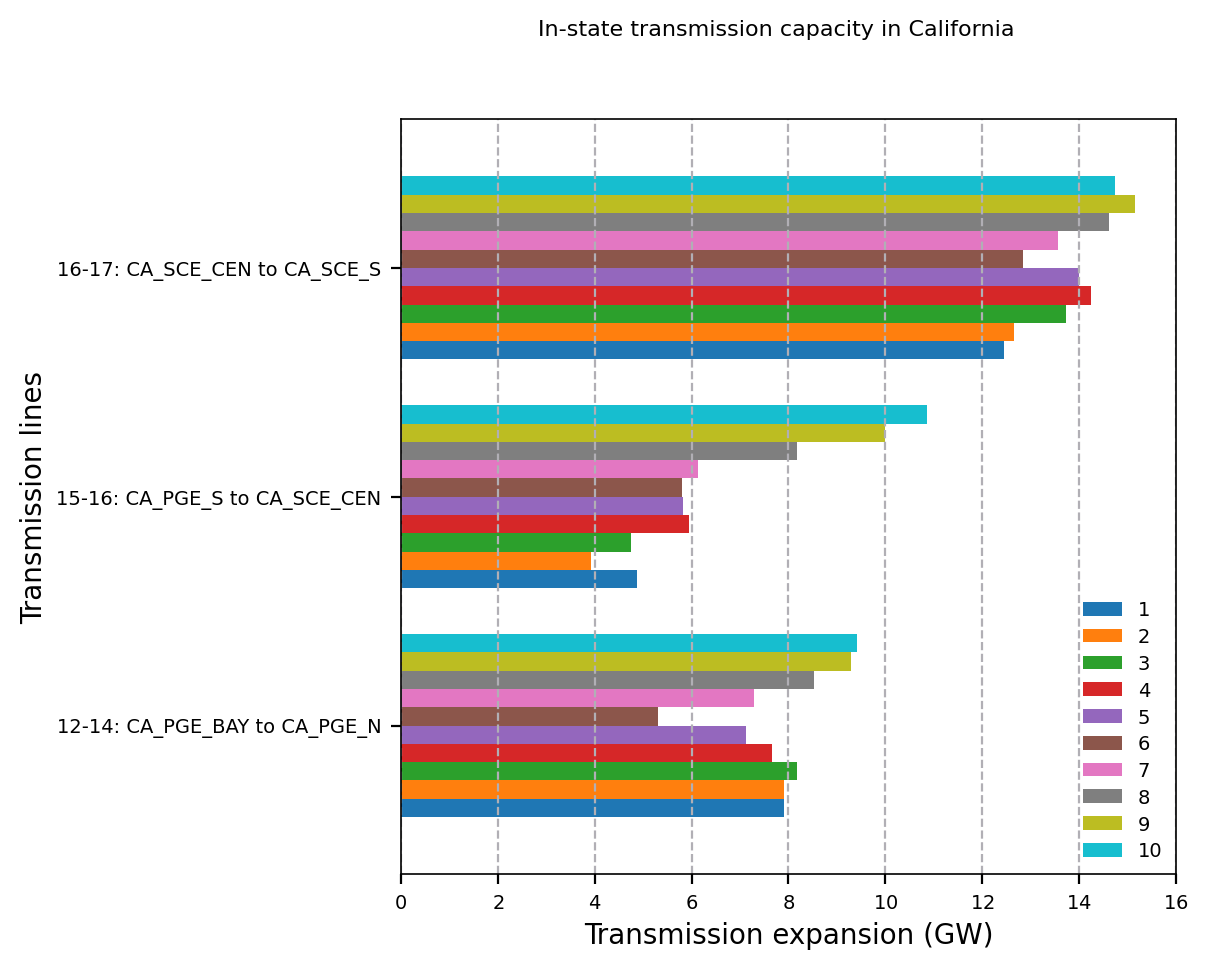

In [74]:
# Start figure environment
fig = plt.figure(figsize=(5,  5), dpi=200)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data_inCA = (build_Tx_inCa_GW[build_Tx_inCa_GW != 0]).dropna()

# Main figure
data_inCA.plot.barh(ax=ax, lw=0, width=0.8)
plt.xlabel("Transmission expansion (GW)")
plt.ylabel("Transmission lines")

ax.grid(axis='x', linestyle='dashed')
fig.suptitle("In-state transmission capacity in California")

plt.legend(fontsize=7)

ax.patch.set_facecolor('white')

plt.savefig("In-state transmission capacity in California.png", transparent=False)


### Tie transmission expansion

In [75]:
build_Tx_tieCa = build_Tx_meta.loc[build_Tx_meta.trans_lz1.str.contains("CA_") ^ build_Tx_meta.trans_lz2.str.contains("CA_")]

build_Tx_tieCa_MW = build_Tx_tieCa.pivot_table(
    index="Tx_lz", columns="scenario", values="BuildTx", aggfunc=np.sum
)

build_Tx_tieCa_MW["index1"]= build_Tx_tieCa_MW.index.str.extract("(\d+)", expand=False).astype(int)
build_Tx_tieCa_MW["index2"]= build_Tx_tieCa_MW.index.str.extract(".-(\d+)", expand=False).astype(int)

build_Tx_tieCa_MW = build_Tx_tieCa_MW.sort_values(["index1", "index2"]).loc[
    :, build_Tx.scenario.unique()]

# Convert units
build_Tx_tieCa_GW = build_Tx_tieCa_MW / 1e3  # MW to GW  

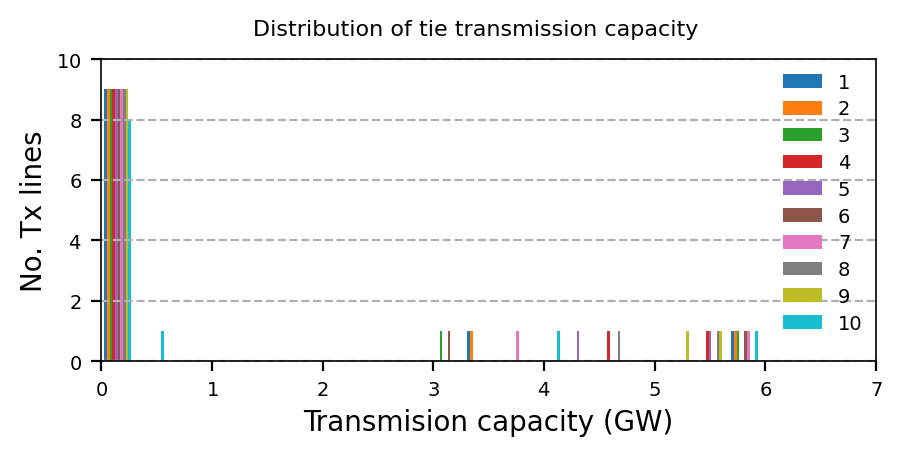

In [76]:
#Plot
fig = plt.figure(figsize=(5,  2), dpi=200)

fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

ax.hist(build_Tx_tieCa_GW.values, lw=0, bins=20, label=build_Tx_tieCa_GW.columns.values)
ax.set_xlim(left=0)

ax.set_xlabel("Transmision capacity (GW)")
ax.set_ylabel("No. Tx lines")

ax.grid(axis='y', linestyle='dashed')

plt.legend(fontsize=7)

fig.suptitle("Distribution of tie transmission capacity")

ax.patch.set_facecolor('white')

plt.savefig("Distribution of tie transmission capacity.png", transparent=False)


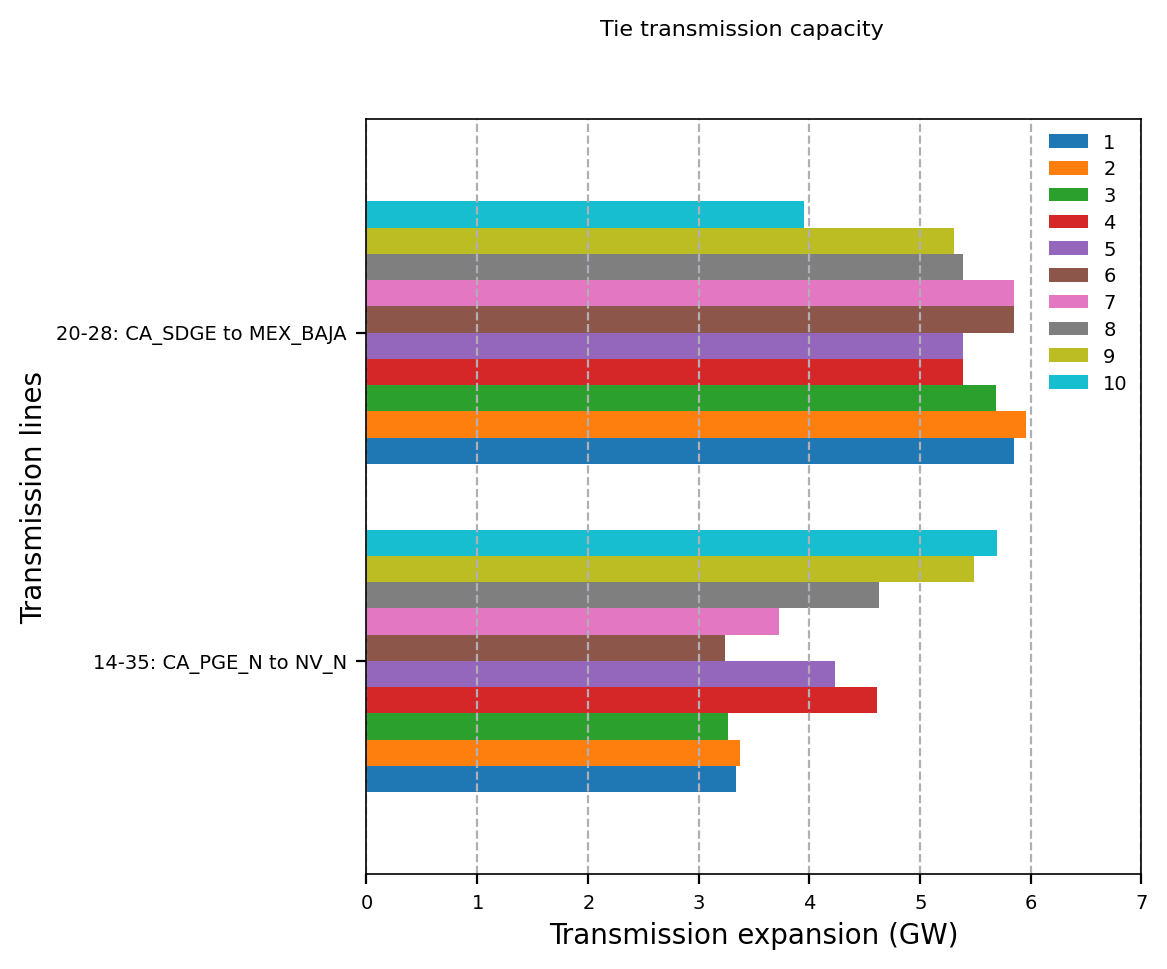

In [77]:
# Start figure environment
fig = plt.figure(figsize=(5,  5), dpi=200)
fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

# Exclude transmission lines with 0 additions
data_tieCA = (build_Tx_tieCa_GW[build_Tx_tieCa_GW != 0]).dropna()

# Main figure
data_tieCA.plot.barh(ax=ax, lw=0, width=0.8)
plt.xlabel("Transmission expansion (GW)")
plt.ylabel("Transmission lines")

ax.grid(axis='x', linestyle='dashed')
fig.suptitle("Tie transmission lines")

plt.legend(fontsize=7)

fig.suptitle("Tie transmission capacity")

ax.patch.set_facecolor('white')

plt.savefig("Tie transmission capacity.png", transparent=False)